In [2]:
#run this cell to make text-cells rtl
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render{
direction:rtl;
}
</style>
""")

# سوال ۱

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("q1_data.csv")

می‌بینیم که ستون‌های جدول داده‌ها خیلی همخوانی ندارند و منبع داده‌ها به عنوان یک سطر شناخته شده‌است.
به وسیله‌ی دستورات زیر جدول داده‌ها را اصلاح می‌کنیم.
- داده‌ها از منبع [https://data.worldbank.org](data.worldbank.org) گرفته شده‌اند.

In [5]:
raw_data

,Unnamed: 0,DataSource,Unnamed:1,https://data.worldbank.org,Unnamed:3,Unnamed:4,Unnamed: 6,Unnamed
0,0,Data,NaN,2016,NaN,NaN,NaN,NaN
1,1,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
2,2,Brazil,BRA,0.817555711,207652865,8358140,B,59324
3,3,Switzerland,CHE,1.077221168,8372098,39516,B,29061
4,4,Germany,DEU,1.193866758,82667685,348900,A,156727
5,5,Denmark,DNK,0.834637611,NaN,42262,B,8575
6,6,Spain,ESP,-0.008048086,46443959,500210,A,223759
7,7,France,FRA,0.407491036,66896109,547557,A,161488
8,8,Japan,JPN,-0.115284177,126994511,364560,B,13231
9,9,Greece,GRC,-0.687542545,10746740,128900,C,2506


In [6]:
raw_data.rename(columns=raw_data.iloc[1],inplace=True)
raw_data.set_index(1,inplace=True)
raw_data.index.name='index'
raw_data.drop(raw_data.index[0:2],inplace=True)

In [7]:
raw_data

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
index,,,,,,,
2,Brazil,BRA,0.817555711,207652865,8358140,B,59324
3,Switzerland,CHE,1.077221168,8372098,39516,B,29061
4,Germany,DEU,1.193866758,82667685,348900,A,156727
5,Denmark,DNK,0.834637611,NaN,42262,B,8575
6,Spain,ESP,-0.008048086,46443959,500210,A,223759
7,France,FRA,0.407491036,66896109,547557,A,161488
8,Japan,JPN,-0.115284177,126994511,364560,B,13231
9,Greece,GRC,-0.687542545,10746740,128900,C,2506
10,Iran,IRN,1.1487886,80277428,1628760,D,90481


خلاصه‌ی اطلاعات دیتاست را توسط پانداس می‌بینیم

In [9]:
raw_data.info()
raw_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2 to 16
Data columns (total 7 columns):
 CountryName              15 non-null object
CountryCode               15 non-null object
Population growth         13 non-null object
Total population          14 non-null object
Area (sq. km)             14 non-null object
International Visitors    15 non-null object
Coronavirus Cases         15 non-null object
dtypes: object(7)
memory usage: 960.0+ bytes


,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
count,15,15,13,14,14,15,15
unique,15,15,13,14,14,4,15
top,France,JPN,-0.115284177,207652865,42262,B,10287
freq,1,1,1,1,1,6,1


ابتدا مشاهده می‌کنیم که تعداد سطر‌های موجود در دیتاست بسیار کم است و باید مراقب باشیم تا الگوریتم‌های مختلفی که روی این دیتاست اعمال می‌کنیم `overfit` .
نکنند
حتی این تعداد داده برای داده‌کاوی شاید مناسب نباشد.

## مقابله با **Missing Values**
در قسمت بالا دیدیم که مقادیر گم شده تنها در ستون‌های عددی یافت می‌شوند و ستون‌های `categorical` کامل هستند.
پس می‌توانیم به چند روش آنها را پر کنیم.

۱- می‌توانیم با `fillna` در پانداس آنها را با مقادیر قبلی یا بعدی پر کنیم.

In [11]:
raw_data.fillna(method='bfill')

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
index,,,,,,,
2,Brazil,BRA,0.817555711,207652865,8358140,B,59324
3,Switzerland,CHE,1.077221168,8372098,39516,B,29061
4,Germany,DEU,1.193866758,82667685,348900,A,156727
5,Denmark,DNK,0.834637611,46443959,42262,B,8575
6,Spain,ESP,-0.008048086,46443959,500210,A,223759
7,France,FRA,0.407491036,66896109,547557,A,161488
8,Japan,JPN,-0.115284177,126994511,364560,B,13231
9,Greece,GRC,-0.687542545,10746740,128900,C,2506
10,Iran,IRN,1.1487886,80277428,1628760,D,90481


۲- می‌توانیم با استفاده از `sklearn.SimpleImputer` مقادیر عددی را با میانگین/میانه/مد پر کنیم.

می‌توانستیم با کشیدن توزیع هر ستون توسط `seaborn` و تحلیل کردن آن بین ۳ شاخص بالا انتخاب کنیم ولی به دلیل کمبود تعداد داده چنین چیزی ممکن نیست.
پس با میانگین مقادیر گم شده را پر می‌کنیم.

In [13]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy='mean')
raw_data[['Population growth']] = imputer.fit_transform(raw_data[['Population growth']])
raw_data[['Total population']] = imputer.fit_transform(raw_data[['Total population']])
raw_data[['Area (sq. km)']] = imputer.fit_transform(raw_data[['Area (sq. km)']])

In [37]:
raw_data

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
index,,,,,,,
2,Brazil,BRA,0.817556,2.07653e+08,8.35814e+06,B,59324
3,Switzerland,CHE,1.07722,8.3721e+06,39516,B,29061
4,Germany,DEU,1.19387,8.26677e+07,348900,A,156727
5,Denmark,DNK,0.834638,1.56572e+08,42262,B,8575
6,Spain,ESP,-0.00804809,4.6444e+07,500210,A,223759
7,France,FRA,0.407491,6.68961e+07,547557,A,161488
8,Japan,JPN,-0.115284,1.26995e+08,364560,B,13231
9,Greece,GRC,-0.687543,1.07467e+07,128900,C,2506
10,Iran,IRN,1.14879,8.02774e+07,1.62876e+06,D,90481


## استفاده از ویژگی‌های `Categorical`

چون الگوریتم‌های رگرسیون که جلوتر از آنها استفاده می‌کنیم توانایی پردازش داده‌های غیر عددی را ندارند، باید ویژگی‌های 
`categorical` 
را نیز به صورت عددی تبدیل کنیم.

که می‌توانیم این کار را به دو صورت انجام دهیم.
- `Label Encoding`
- `One hot encoding`

که اینجا چون ستون `international visitors` ترتیب دارد می‌توانیم با `label` گذاری این کار را انجام دهیم که ترتیت آن نیز به هم نخورد.

In [39]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder = LabelEncoder()
encoding_results = encoder.fit_transform(raw_data['International Visitors'])

نتایج را برعکس می‌کنیم تا معنی‌دار تر شوند (کشورهای توریستی‌تر مقدار بیشتری داشته باشند).

In [44]:
encoding_results = 4 - encoding_results

In [45]:
raw_data['International Visitors'] = encoding_results

In [46]:
raw_data

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
index,,,,,,,
2,Brazil,BRA,0.817556,2.07653e+08,8.35814e+06,3,59324
3,Switzerland,CHE,1.07722,8.3721e+06,39516,3,29061
4,Germany,DEU,1.19387,8.26677e+07,348900,4,156727
5,Denmark,DNK,0.834638,1.56572e+08,42262,3,8575
6,Spain,ESP,-0.00804809,4.6444e+07,500210,4,223759
7,France,FRA,0.407491,6.68961e+07,547557,4,161488
8,Japan,JPN,-0.115284,1.26995e+08,364560,3,13231
9,Greece,GRC,-0.687543,1.07467e+07,128900,2,2506
10,Iran,IRN,1.14879,8.02774e+07,1.62876e+06,1,90481


خب حالا همه‌ی فیچر‌ها عددی شده‌اند .

(دو ستون اسم و کد کشور چون مقادیر `unique` دارند، ارزشی به عنوان فیچر ندارند.)

## Feature Scaling
چون قرار است از رگرسیون در ادامه استفاده کنیم، انجام 
`feature scaling` 
فرقی در جواب ایجاد نمی‌کند. ولی توضیح ضرایب مختلف بدست آمده توسط الگوریتم و اثر هر فیچر را ممکن می‌کند.

می‌توانیم همچنین از دو روش
- `Standard Scaling`
- `Min Max Scaling`
استفاده کنیم،

مقادیر منفی برای ستون `population growth` معنی‌دارند ولی بهتر است بقیه‌ی ستون‌ها مقادیر مثبت داشته باشند.
پس این ستون را با `Standard Scaler`و
بقیه‌ی ستون‌ها را با
`Min Max Scaler`
اندازه می‌کنیم.

In [47]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [54]:
standard_scaler = StandardScaler()
raw_data[['Population growth']] = standard_scaler.fit_transform(raw_data[['Population growth']])

In [57]:
min_max_scaler = MinMaxScaler()
raw_data[['Total population','Area (sq. km)','International Visitors','Coronavirus Cases']] =\
min_max_scaler.fit_transform(raw_data[['Total population','Area (sq. km)','International Visitors','Coronavirus Cases']])

In [58]:
raw_data

,CountryName,CountryCode,Population growth,Total population,Area (sq. km),International Visitors,Coronavirus Cases
index,,,,,,,
2,Brazil,BRA,-2.977201e-01,0.155178,1.000000,0.666667,0.261222
3,Switzerland,CHE,-5.996225e-02,0.004390,0.003343,0.666667,0.125256
4,Germany,DEU,4.684212e-02,0.060607,0.040411,1.000000,0.698837
5,Denmark,DNK,-2.820794e-01,0.116527,0.003672,0.666667,0.033215
6,Spain,ESP,-1.053669e+00,0.033198,0.058539,1.000000,1.000000
7,France,FRA,-6.731882e-01,0.048673,0.064212,1.000000,0.720227
8,Japan,JPN,-1.151858e+00,0.094147,0.042287,0.666667,0.054134
9,Greece,GRC,-1.675835e+00,0.006187,0.014053,0.333333,0.005949
10,Iran,IRN,5.567137e-03,0.058798,0.193751,0.000000,0.401205


## داده‌های پرت

In [59]:
from scipy import stats

در یک روش می‌توانیم داده‌هایی که
`z-score`
کمتر از -۳
یا بیشتر از ۳ دارند را حذف کنیم.

In [104]:
print(np.abs(stats.zscore(raw_data.iloc[:,2:-1])))
(np.abs(stats.zscore(raw_data.iloc[:,2:-1]))>3).any(axis=1)

[[2.97720105e-01 1.60173480e-01 3.48412956e+00 3.53553391e-01]
 [5.99622526e-02 4.64713987e-01 5.61135868e-01 3.53553391e-01]
 [4.68421153e-02 2.31744283e-01 4.10685457e-01 1.41421356e+00]
 [2.82079381e-01 5.75118331e-17 5.59800515e-01 3.53553391e-01]
 [1.05366889e+00 3.45331524e-01 3.37104885e-01 1.41421356e+00]
 [6.73188208e-01 2.81199433e-01 3.14080502e-01 1.41421356e+00]
 [1.15185762e+00 9.27480400e-02 4.03070152e-01 3.53553391e-01]
 [1.67583537e+00 4.57267789e-01 5.17669304e-01 7.07106781e-01]
 [5.56713718e-03 2.39239446e-01 2.11697934e-01 1.76776695e+00]
 [1.63119528e+00 4.78258747e-01 1.12655325e-16 7.07106781e-01]
 [1.48262460e-16 3.80348583e-01 3.63320790e-01 7.07106781e-01]
 [1.35176959e+00 9.22438047e-02 1.37453576e-01 1.76776695e+00]
 [2.15389605e+00 4.82908320e-01 5.74706283e-01 3.53553391e-01]
 [1.48262460e-16 4.59913133e-01 3.82281246e-01 7.07106781e-01]
 [5.04164990e-03 3.66125600e+00 8.65481083e-01 3.53553391e-01]]


array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

می‌بینیم که دو ردیف از داده‌ها شامل یه ویژگی پرت است.(جمعیت هند و مساحت برزیل) ولی این داده‌ها واقعی هستند و پرت نیستند

در صورتی که یک مدل با حذف کردن این دو کشور بهتر کار کرد، آنها را حذف می‌کنیم.

# رگرسیون
فرض می‌کنیم که همه‌ی داده‌ی ما آموزش است.

In [73]:
X_train , y_train = raw_data.iloc[:,2:-1] , raw_data['Coronavirus Cases']

ابتدا با استفاده از `sklearn` یک رگرسیون چندتایی روی آن اعمال می‌کنیم.

In [76]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

عرض از مبدا:

In [80]:
print('intecept:', lr_model.intercept_)

intecept: -0.06696983141276056


ضرایب مدل:

In [86]:
pd.DataFrame(lr_model.coef_,X_train.columns,columns=['coefficient'])

,coefficient
Population growth,-0.049638
Total population,-0.228415
Area (sq. km),0.087727
International Visitors,0.572863


خطاهای `MSE` و `RMSE`

In [87]:
from sklearn import metrics

In [92]:
prediction_train = lr_model.predict(X_train)
print('MSE:',metrics.mean_squared_error(y_train,prediction_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))
print('R-squared:',metrics.r2_score(y_train,prediction_train))

MSE: 0.05426888346862779
RMSE: 0.2329568274780282
R-squared: 0.43245261118200773


می‌بینیم که r^2 مقدار کمی دارد پس خط خوبی نداریم.

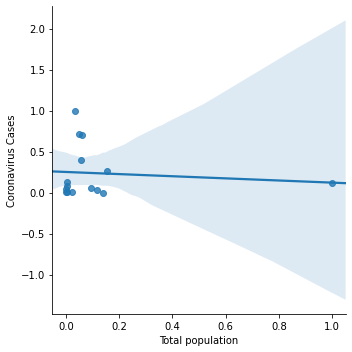

In [97]:
sns.lmplot('Total population','Coronavirus Cases',raw_data)

یکی از نکات عجیب دیگر این بود که ضریب جمعیت در رگرسیون منفی شد.
بنابراین نمودار آن را رسم کردیم و دیدیم که در این داده تعداد کرونا خیلی ربطی به جمعیت نداشته
و دوم اینکه هند با جمعیت بسیار زیاد خیلی خط را خراب کرده است. پس دو داده‌ی پرت را حذف می‌کنیم.

In [108]:
new_data = raw_data.drop(raw_data[(np.abs(stats.zscore(raw_data.iloc[:,2:-1]))>3).any(axis=1)].index).copy()

دوباره رگرسیون را روی دیتای جدید می‌سازیم.

In [111]:
X_train , y_train = new_data.iloc[:,2:-1] , new_data['Coronavirus Cases']
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
prediction_train = lr_model.predict(X_train)
print('MSE:',metrics.mean_squared_error(y_train,prediction_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,prediction_train)))
print('R-squared:',metrics.r2_score(y_train,prediction_train))

MSE: 0.02387607535983631
RMSE: 0.1545188511471539
R-squared: 0.7811440462939105


می‌بینیم که r^2 مقداری بهبود پیدا کرده است.

In [116]:
import statsmodels.formula.api as smf

In [120]:
st_model = smf.ols('Q("Coronavirus Cases") ~  Q("Population growth") + Q("Total population") + Q("Area (sq. km)") + Q("International Visitors")',data=new_data).fit()

می‌توانیم همین شاخص‌هارا با`statmodels` 
نیز داشته باشیم.

عرض از مبدا و ضرایب

In [121]:
st_model.params

Intercept                     -0.511873
Q("Population growth")        -0.068172
Q("Total population")         -0.192657
Q("Area (sq. km)")             4.298509
Q("International Visitors")    0.951735
dtype: float64

In [123]:
#confusion intervals
st_model.conf_int()

,0,1
Intercept,-0.913796,-0.109951
"Q(""Population growth"")",-0.192964,0.056621
"Q(""Total population"")",-3.065282,2.679968
"Q(""Area (sq. km)"")",1.534329,7.062689
"Q(""International Visitors"")",0.488407,1.415062


In [124]:
st_model.pvalues

Intercept                      0.018800
Q("Population growth")         0.243274
Q("Total population")          0.880923
Q("Area (sq. km)")             0.007126
Q("International Visitors")    0.001470
dtype: float64

می‌بینیم که رشد جمعیت و کل جمعیت p-value 
بیشتر از ۰.۰۵ دارند.
پس خیلی قابل اعتماد نیستند.

In [126]:
st_model.rsquared

0.7811440462939105

r^2 هم همان مقدار محاسبه شده توسط `sklearn` است.

ضرایب فیچر‌ها در مدل هم آنقدر زیاد نیست که بخواهیم از ridgre یا  lasso استفاده کنیم.
و ضرایب نزدیک به هم هستند.

## Polynomial Regression

In [137]:
df = pd.DataFrame({'pop':new_data['Total population'],'pop^2':new_data['Total population']**2,'y':new_data['Coronavirus Cases']})

برای ساختن یک رگرسیون درجه‌ی ۲:

جمعیت را به توان دو رسانده و در یک ستون دیگر قرار می‌دهیم
حالا روی این دو ستون یک
`Linear Regression`
اعمال می‌کنیم.

In [138]:
df

,pop,pop^2,y
index,,,
3,0.004390,0.000019,0.125256
4,0.060607,0.003673,0.698837
5,0.116527,0.013579,0.033215
6,0.033198,0.001102,1.000000
7,0.048673,0.002369,0.720227
8,0.094147,0.008864,0.054134
9,0.006187,0.000038,0.005949
10,0.058798,0.003457,0.401205
11,0.001122,0.000001,0.008505


In [139]:
X_train , y_train = df[['pop','pop^2']] , df['y']

In [140]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

مقادیر خواسته شده:

In [145]:
print(f"""
a = {polynomial_reg.coef_[1]}
b = {polynomial_reg.coef_[0]}
c = {polynomial_reg.intercept_}
""")


a = -130.77526873620045
b = 16.424190514819355
c = 0.028958364957279575



In [146]:
prediction_train = polynomial_reg.predict(X_train)

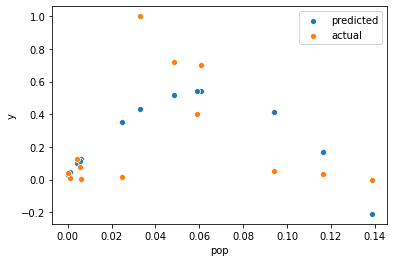

In [157]:
sns.scatterplot(x=X_train['pop'],y=prediction_train)
sns.scatterplot(x=X_train['pop'],y=y_train)
plt.legend(labels=['predicted','actual'])

In [158]:
polynomial_reg.score(X_train,y_train)

0.4796000604422766

برای یک ویژگی به تنهایی (جمعیت)
r^2
بدی نداریم ولی اصلا کافی نیست